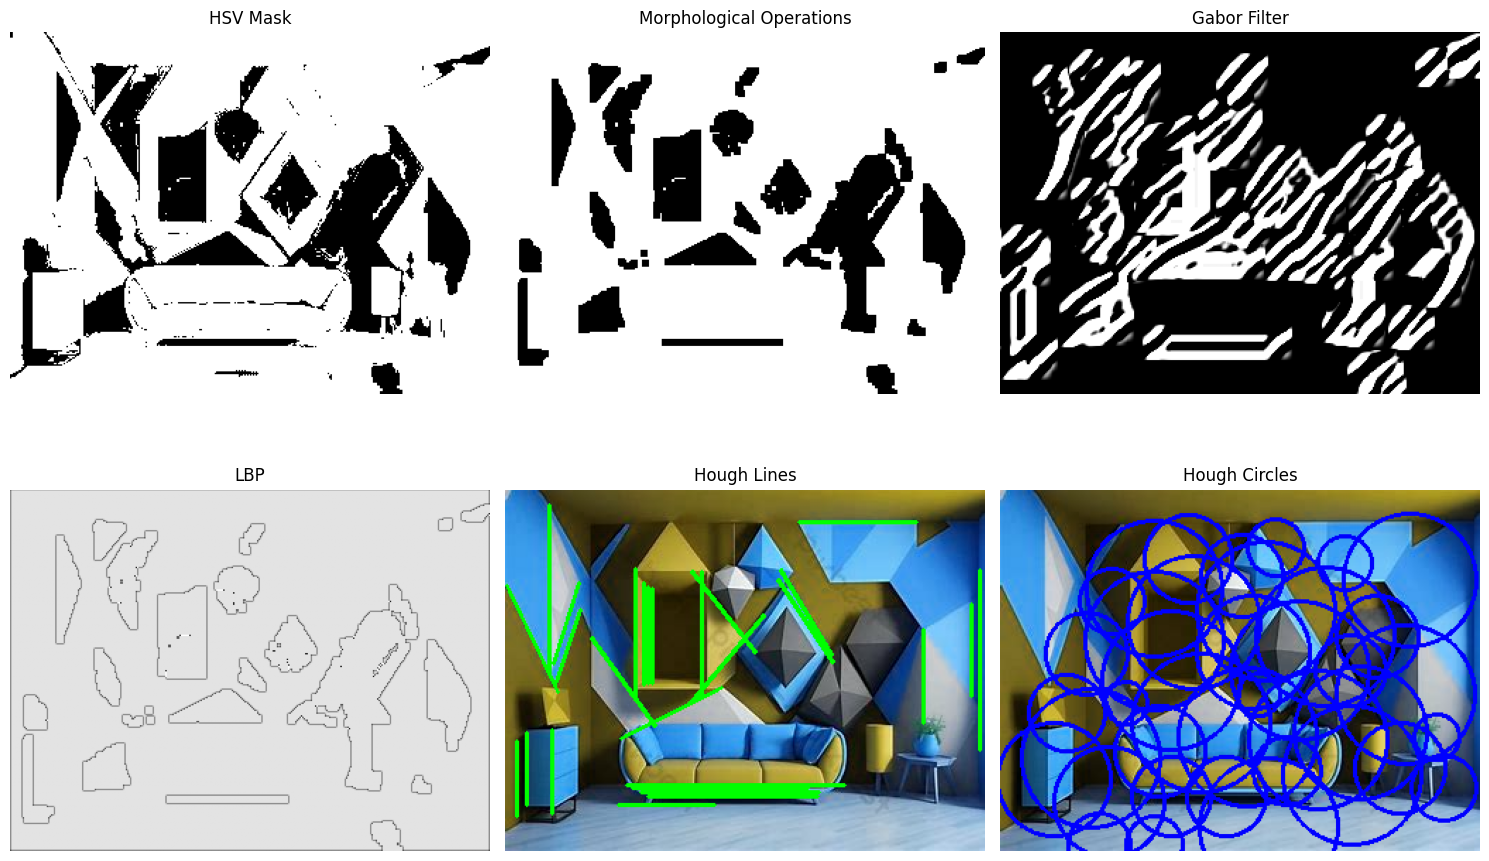

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def load_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray

def apply_hsv_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([0, 50, 50])
    upper_bound = np.array([179, 255, 255])
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask, morph

def gabor_filter(gray):
    ksize = 21  # Kernel size
    sigma = 5   # Standard deviation
    theta = np.pi/4  # Orientation
    lambd = 10  # Wavelength
    gamma = 0.5 # Aspect ratio
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, ktype=cv2.CV_32F)
    return cv2.filter2D(gray, cv2.CV_8U, kernel)

def compute_lbp(gray):
    radius = 1
    n_points = 8 * radius
    return local_binary_pattern(gray, n_points, radius, method="uniform")

def detect_hough_lines(gray, img):
    edges = cv2.Canny(gray, 50, 150)
    lines_img = img.copy()
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=5)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lines_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return lines_img

def detect_hough_circles(gray, img):
    circles_img = img.copy()
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=10, maxRadius=50)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(circles_img, (i[0], i[1]), i[2], (0, 0, 255), 2)
    return circles_img

def process_image(image_path):
    img, gray = load_image(image_path)
    hsv_mask, morph = apply_hsv_mask(img)
    gabor = gabor_filter(morph)
    lbp = compute_lbp(morph)
    hough_lines = detect_hough_lines(gray, img)
    hough_circles = detect_hough_circles(gray, img)
    
    return [hsv_mask, morph, gabor, lbp.astype(np.uint8), hough_lines, hough_circles]

def plot_results(image_path):
    results = process_image(image_path)
    titles = ["HSV Mask", "Morphological Operations", "Gabor Filter", "LBP", "Hough Lines", "Hough Circles"]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i in range(6):
        axes[i].imshow(results[i], cmap="gray")
        axes[i].set_title(titles[i])
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

plot_results("shapes.jpg")


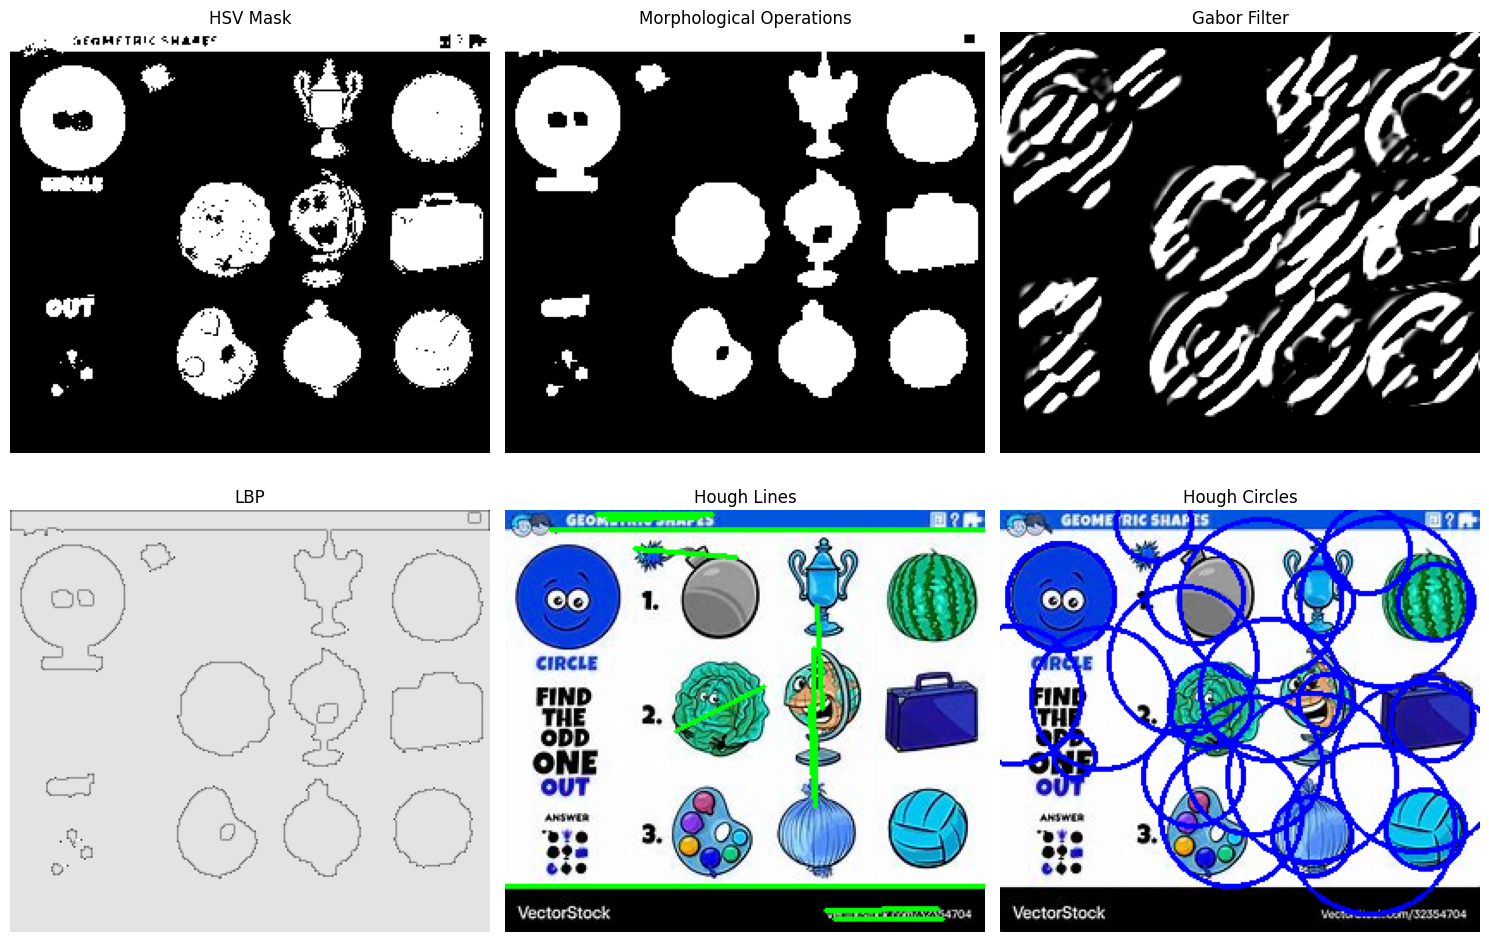

In [11]:
plot_results("circles.jpg")

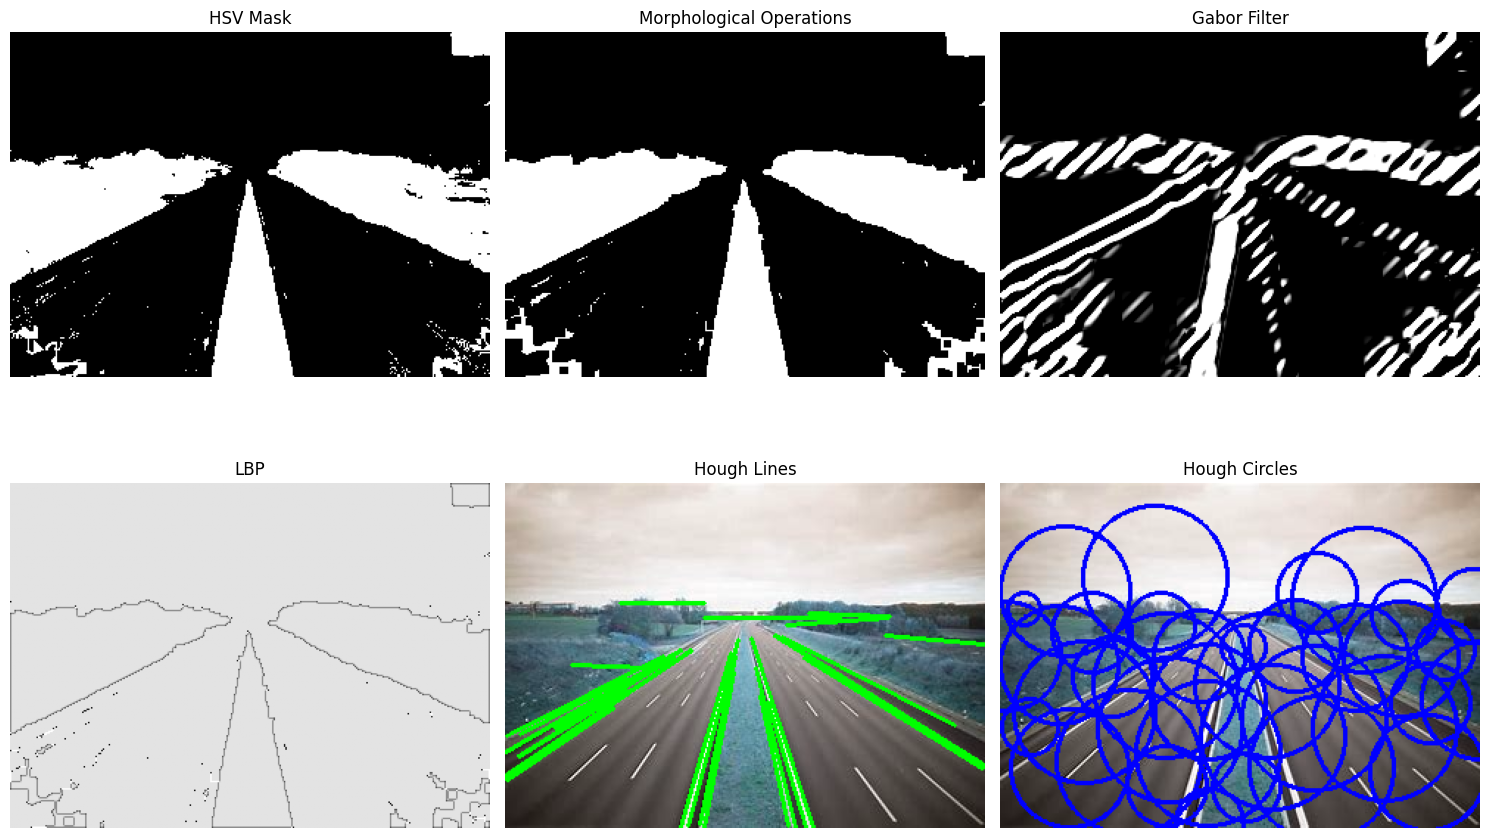

In [12]:
plot_results("road.jpg")